# Tensor and Variable
这是 PyTorch 基础的第二课，通过本次课程，你能够学会如何像使用 NumPy 一样使用 PyTorch，了解到 PyTorch 中的基本元素 Tensor 和 Variable 及其操作方式。

### PyTorch 的0.4版本，取消了Variable。学习过程中，讲参考官方教程，取消Variable。 2018.5.9

## 把 PyTorch 当做 NumPy 用
PyTorch 的官方介绍是一个拥有强力GPU加速的张量和动态构建网络的库，其主要构件是张量，所以我们可以把 PyTorch 当做 NumPy 来用，PyTorch 的很多操作好 NumPy 都是类似的，但是因为其能够在 GPU 上运行，所以有着比 NumPy 快很多倍的速度。

In [1]:
import torch
import numpy as np

In [5]:
# 创建一个 numpy ndarray
numpy_tensor = np.random.randn(2, 3)

### 我们可以使用下面两种方式将numpy的ndarray转换到tensor上

In [6]:
pytorch_tensor1 = torch.Tensor(numpy_tensor)
pytorch_tensor2 = torch.from_numpy(numpy_tensor)

In [7]:
pytorch_tensor1

tensor([[ 0.7437,  0.7671, -0.0764],
        [ 0.0332, -0.4657, -0.7969]])

In [8]:
pytorch_tensor2

tensor([[ 0.7437,  0.7671, -0.0764],
        [ 0.0332, -0.4657, -0.7969]], dtype=torch.float64)

使用以上两种方法进行转换的时候，会直接将 NumPy ndarray 的数据类型转换为对应的 PyTorch Tensor 数据类型

### 同时我们也可以使用下面的方法将 pytorch tensor 转换为 numpy ndarray

In [9]:
# 如果 pytorch tensor 在 cpu 上
numpy_array = pytorch_tensor1.numpy()
numpy_array

array([[ 0.74372685,  0.76713997, -0.0764489 ],
       [ 0.03319645, -0.46571371, -0.79694438]], dtype=float32)

In [10]:
# 如果 pytorch tensor 在 gpu 上
numpy_array = pytorch_tensor1.cpu().numpy()
numpy_array

array([[ 0.74372685,  0.76713997, -0.0764489 ],
       [ 0.03319645, -0.46571371, -0.79694438]], dtype=float32)

需要注意 GPU 上的 Tensor 不能直接转换为 NumPy ndarray，需要使用`.cpu()`先将 GPU 上的 Tensor 转到 CPU 上

# PyTorch Tensor 使用 GPU 加速

我们可以使用以下两种方式将 Tensor 放到 GPU 上

In [13]:
# 第一种方式是定义 cuda 数据类型
dtype = torch.cuda.FloatTensor # 定义默认 GPU 的 数据类型
gpu_tensor = torch.randn(3, 4).type(dtype)

# 第二种方式更简单，推荐使用
gpu_tensor = torch.randn(3, 4).cuda(0) # 将 tensor 放到第一个 GPU 上
# gpu_tensor = torch.randn(3, 4).cuda(1) # 将 tensor 放到第二个 GPU 上

In [14]:
gpu_tensor

tensor([[-0.8543,  0.7286, -0.7756,  1.3713],
        [ 0.8456,  0.6694, -0.9252, -0.4202],
        [ 0.1094,  0.2967,  0.4238,  1.0210]], device='cuda:0')

使用第一种方式将 tensor 放到 GPU 上的时候会将数据类型转换成定义的类型，而是用第二种方式能够直接将 tensor 放到 GPU 上，类型跟之前保持一致

推荐在定义 tensor 的时候就明确数据类型，然后直接使用第二种方法将 tensor 放到 GPU 上

而将 tensor 放回 CPU 的操作非常简单

In [15]:
cpu_tensor = gpu_tensor.cpu()

In [16]:
cpu_tensor

tensor([[-0.8543,  0.7286, -0.7756,  1.3713],
        [ 0.8456,  0.6694, -0.9252, -0.4202],
        [ 0.1094,  0.2967,  0.4238,  1.0210]])

我们也能够访问到 Tensor 的一些属性

In [17]:
# 可以通过下面两种方式得到 tensor 的大小
print(pytorch_tensor1.shape)
print(pytorch_tensor1.size())

torch.Size([2, 3])
torch.Size([2, 3])


In [18]:
# 得到 tensor 的数据类型
print(pytorch_tensor1.type())

torch.FloatTensor


In [19]:
# 得到 tensor 的维度
print(pytorch_tensor1.dim())

2


In [20]:
# 得到 tensor 的所有元素个数
print(pytorch_tensor1.numel())

6


**小练习**

查阅以下[文档](http://pytorch.org/docs/0.3.0/tensors.html)了解 tensor 的数据类型，创建一个 float64、大小是 3 x 2、随机初始化的 tensor，将其转化为 numpy 的 ndarray，输出其数据类型

参考输出: float64

In [22]:
# 答案
x = torch.randn(3, 2)
x = x.type(torch.DoubleTensor)
x_array = x.numpy()
print(x)
print(x.dtype)
print(x_array)
print(x_array.dtype)

tensor([[ 0.2012,  1.7180],
        [ 0.1420, -0.1729],
        [-1.0315, -1.0158]], dtype=torch.float64)
torch.float64
[[ 0.20117491  1.7180407 ]
 [ 0.14203046 -0.17285655]
 [-1.0315218  -1.01581919]]
float64


## Tensor的操作
Tensor 操作中的 api 和 NumPy 非常相似，如果你熟悉 NumPy 中的操作，那么 tensor 基本是一致的，下面我们来列举其中的一些操作

In [29]:
x = torch.ones(2, 2)
print(x) # 这是一个float tensor
print(x.type())

tensor([[ 1.,  1.],
        [ 1.,  1.]])
torch.FloatTensor


In [30]:
# 将其转化为整形
x = x.long()
# x = x.type(torch.LongTensor)
print(x)
print(x.type())

tensor([[ 1,  1],
        [ 1,  1]])
torch.LongTensor


In [33]:
# 再将其转回 float
x = x.float()
# x = x.type(torch.FloatTensor)
print(x)
print(x.type())

tensor([[ 0.4499,  1.2821,  2.9692],
        [ 0.0322,  2.4848,  0.3364],
        [ 2.4330,  0.2366, -1.3215],
        [-0.3897, -0.2015,  1.6729]])
torch.FloatTensor


In [34]:
x = torch.randn(4, 3)
print(x)
print(x.type())

tensor([[-1.5145, -2.1652, -0.0994],
        [ 1.0847,  1.0118, -0.4406],
        [ 1.8481, -1.6140,  0.5662],
        [-1.3909, -0.4836, -0.1394]])
torch.FloatTensor


In [35]:
# 沿着行取最大值
max_value, max_idx = torch.max(x, dim=1)

In [36]:
# 每一行的最大值
max_value

tensor([-0.0994,  1.0847,  1.8481, -0.1394])

In [37]:
# 每一行最大值的下标
max_idx

tensor([ 2,  0,  0,  2])

In [38]:
# 沿着行对 x 求和
sum_x = torch.sum(x, dim=1)
print(sum_x)

tensor([-3.7791,  1.6559,  0.8003, -2.0139])


In [39]:
# 增加维度或者减少维度
print(x.shape)
x = x.unsqueeze(0) # 在第一维增加
print(x.shape)

torch.Size([4, 3])
torch.Size([1, 4, 3])


In [40]:
x = x.unsqueeze(1) # 在第二维增加
print(x.shape)

torch.Size([1, 1, 4, 3])


In [41]:
x = x.squeeze(0) # 减少第一维
print(x.shape)

torch.Size([1, 4, 3])


In [42]:
x = x.squeeze() # 将 tensor 中所有的一维全部都去掉
print(x.shape)

torch.Size([4, 3])


In [43]:
x = torch.randn(3, 4, 5)
print(x.shape)

# 使用permute和transpose进行维度交换
x = x.permute(1, 0, 2) # permute 可以重新排列 tensor 的维度
print(x.shape)

x = x.transpose(0, 2)  # transpose 交换 tensor 中的两个维度
print(x.shape)

torch.Size([3, 4, 5])
torch.Size([4, 3, 5])
torch.Size([5, 3, 4])


In [44]:
# 使用 view 对 tensor 进行 reshape
x = torch.randn(3, 4, 5)
print(x.shape)

x = x.view(-1, 5) # -1 表示任意的大小，5 表示第二维变成 5
print(x.shape)

x = x.view(3, 20) # 重新 reshape 成 (3, 20) 的大小
print(x.shape)

torch.Size([3, 4, 5])
torch.Size([12, 5])
torch.Size([3, 20])


In [46]:
x = torch.randn(3, 4)
y = torch.randn(3, 4)

# 两个 tensor 求和
z = x + y
# z = torch.add(x, y)
print(x)
print(y)
print(z)

tensor([[ 0.7610,  0.2855,  1.3986, -0.1643],
        [ 0.7667,  0.5104,  1.7954, -0.6419],
        [ 0.5863,  1.2131, -0.8869, -0.1788]])
tensor([[ 1.1059, -0.6449,  1.8951,  0.4803],
        [ 0.6212,  2.3117,  1.6872,  0.2858],
        [ 0.5558,  0.0860, -0.0671, -0.0377]])
tensor([[ 1.8669, -0.3593,  3.2938,  0.3161],
        [ 1.3879,  2.8220,  3.4826, -0.3561],
        [ 1.1421,  1.2992, -0.9540, -0.2165]])


另外，pytorch中大多数的操作都支持 **inplace 操作**，也就是**可以直接对 tensor 进行操作而不需要另外开辟内存空间**，方式非常简单，一般都是在操作的符号后面加`_`，比如

In [47]:
x = torch.ones(3, 3)
print(x.shape)

# unsqueeze 进行 inplace
x.unsqueeze_(0)
print(x.shape)

# transpose 进行 inplace
x.transpose_(1, 0)
print(x.shape)

torch.Size([3, 3])
torch.Size([1, 3, 3])
torch.Size([3, 1, 3])


In [56]:
x = torch.ones(3, 3)
print(x)
y = torch.ones(3, 3)
print(y)
# add 进行 inplace
z = x.add_(y)
print(z)

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])
tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])
tensor([[ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.]])


**小练习**

访问[文档](http://pytorch.org/docs/0.3.0/tensors.html)了解 tensor 更多的 api，实现下面的要求

创建一个 float32、4 x 4 的全为1的矩阵，将矩阵正中间 2 x 2 的矩阵，全部修改成2

参考输出
$$
\left[
\begin{matrix}
1 & 1 & 1 & 1 \\
1 & 2 & 2 & 1 \\
1 & 2 & 2 & 1 \\
1 & 1 & 1 & 1
\end{matrix}
\right] \\
[torch.FloatTensor\ of\ size\ 4x4]
$$

In [57]:
# 答案
x = torch.ones(4, 4).float()
print(x)
x[1:3, 1:3] = 2
print(x)

tensor([[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]])
tensor([[ 1.,  1.,  1.,  1.],
        [ 1.,  2.,  2.,  1.],
        [ 1.,  2.,  2.,  1.],
        [ 1.,  1.,  1.,  1.]])


## Variable (0.4 版本，已经取消，直接用Tensor即可，以下代码已更新)
tensor 是 PyTorch 中的完美组件，但是构建神经网络还远远不够，我们需要能够构建计算图的 tensor，这就是 Variable。Variable 是对 tensor 的封装，操作和 tensor 是一样的，但是每个 Variabel都有三个属性，Variable 中的 tensor本身`.data`，对应 tensor 的梯度`.grad`以及这个 Variable 是通过什么方式得到的`.grad_fn`

In [114]:
x_tensor = torch.randn(3, 5)
y_tensor = torch.randn(3, 5)
print(x_tensor)
print(x_tensor.grad_fn)
print(y_tensor)
print(y_tensor.grad_fn)

tensor([[ 0.1864,  0.7588, -0.0668,  1.7709, -0.0941],
        [-0.2329,  0.4089,  0.0436, -0.3642,  2.0783],
        [ 0.9072,  0.6619,  0.1193, -0.4277,  0.2205]])
None
tensor([[ 0.9032, -0.1002, -0.6779, -0.8189,  1.3383],
        [-0.0235,  1.8695,  0.5857, -0.3114, -1.8381],
        [ 0.1472, -1.1911, -0.6400,  0.6047,  0.8609]])
None


In [115]:
z = torch.sum(x_tensor + y_tensor) # 返回输入张量input 所有元素的和
print(z.data)
print(z.grad_fn)

tensor(6.6784)
None


In [121]:
x = x_tensor 
x.requires_grad = True # 默认是不需要求梯度的，用这个方式申明需要对其进行求梯度
y = y_tensor
y.requires_grad = True
print(x.data)
print(x.grad_fn)
print(y)

tensor([[ 0.1864,  0.7588, -0.0668,  1.7709, -0.0941],
        [-0.2329,  0.4089,  0.0436, -0.3642,  2.0783],
        [ 0.9072,  0.6619,  0.1193, -0.4277,  0.2205]])
None
tensor([[ 0.9032, -0.1002, -0.6779, -0.8189,  1.3383],
        [-0.0235,  1.8695,  0.5857, -0.3114, -1.8381],
        [ 0.1472, -1.1911, -0.6400,  0.6047,  0.8609]])


In [122]:
z = torch.sum(x + y)
print(z.data)
print(z.grad_fn)

tensor(6.6784)


上面我们打出了 z 中的 tensor 数值，同时通过`grad_fn` (SumBackward0)知道了其是通过 Sum 这种方式得到的

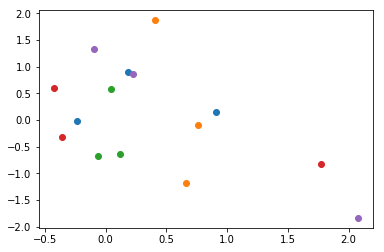

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x.detach().numpy(), y.detach().numpy(),'o')
plt.show()

In [132]:
# 求 x 和 y 的梯度
z.backward()

print(x.grad)
print(y.grad)
print(z.grad)

tensor([[ 5.,  5.,  5.,  5.,  5.],
        [ 5.,  5.,  5.,  5.,  5.],
        [ 5.,  5.,  5.,  5.,  5.]])
tensor([[ 5.,  5.,  5.,  5.,  5.],
        [ 5.,  5.,  5.,  5.,  5.],
        [ 5.,  5.,  5.,  5.,  5.]])
None


通过`.grad`我们得到了 x 和 y 的梯度，这里我们使用了 PyTorch 提供的自动求导机制，非常方便，下一小节会具体讲自动求导。

In [100]:
print(z.requires_grad)
print((z ** 2).requires_grad)
print((z ** 2).grad_fn)
with torch.no_grad():
    print((z ** 2).requires_grad)

True
True
False


In [101]:
print(z.requires_grad)
print((z * 2).requires_grad)
print((z * 2).grad_fn)
with torch.no_grad():
    print((z * 2).requires_grad)

True
True
False


**小练习**

尝试构建一个函数 $y = x^2 $，然后求 x=2 的导数。

参考输出：4

提示：

$y = x^2$的图像如下

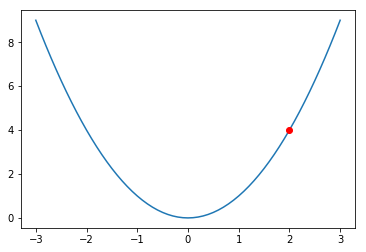

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(-3, 3.01, 0.1)
y = x ** 2
plt.plot(x, y)
plt.plot(2, 4, 'ro')
plt.show()

In [105]:
# 答案
x = torch.FloatTensor([2])
x.requires_grad=True
y = x ** 2
y.backward()
print(x.grad)

tensor([ 4.])


下一次课程我们将会从导数展开，了解 PyTorch 的自动求导机制

In [106]:
x = torch.FloatTensor([0])
x.requires_grad=True
y = x ** 2
y.backward()
print(x.grad)

tensor([ 0.])


In [107]:
x = torch.FloatTensor([-2])
x.requires_grad=True
y = x ** 2
y.backward()
print(x.grad)

tensor([-4.])


In [119]:
x = torch.FloatTensor([3])
x.requires_grad=True
y = x ** 2
y.backward()
print(x.grad)

tensor([ 6.])


In [120]:
x = torch.FloatTensor([30])
x.requires_grad=True
y = x ** 2
y.backward()
print(x.grad)

tensor([ 60.])
